<a href="https://colab.research.google.com/github/iamafifaah/Google-Colab/blob/main/Regresi_NDVI_dan_Data_Hujan_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresi NDVI dan Data Hujan

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2021.csv to 2021.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Rainfalll (2).csv to Rainfalll (2).csv


###MEMBACA FILE NDVI utk mengetahui tipe data date

In [ ]:
ndvi = pd.read_csv('2021.csv')  # Membaca file CSV
ndvi.head()

,system:time_start,NDVI
0,"Jan 4, 2021",0.271
1,"Jan 4, 2021",0.179
2,"Jan 9, 2021",0.305
3,"Jan 9, 2021",0.232
4,"Jan 14, 2021",0.391


###MEMBACA FILE Rainfall utk mengetahui tipe data date

In [ ]:
rainfall = pd.read_csv('Rainfalll (2).csv')  # Membaca file CSV
rainfall.head()

,system:index,ID_22,date,mean,month,year
0,4,107,2020-01-01T00:00:00,289.38,1.0,2020
1,6,111,2020-01-01T00:00:00,289.38,1.0,2020
2,5,109,2020-01-01T00:00:00,289.38,1.0,2020
3,44,241,2020-01-01T00:00:00,271.68,1.0,2020
4,2,105,2020-01-01T00:00:00,289.38,1.0,2020


##Mengubah tipe data date pada NDVI ke 00 Month 0000

In [ ]:
# Asumsikan kolom tanggal bernama 'system:time_start'
# Ubah kolom tanggal ke format datetime object
ndvi['system:time_start'] = pd.to_datetime(ndvi['system:time_start'], format='%d %B %Y') # Changed format to '%d %B %Y' to match the actual format "05 January 2020"

# Ubah ke format "day month year"
ndvi['system:time_start'] = ndvi['system:time_start'].dt.strftime('%d %B %Y')

# Simpan DataFrame yang sudah diubah ke file CSV baru (opsional)
ndvi.to_csv('ndvinew.csv', index=False)

# Tampilkan DataFrame yang sudah diubah
print('ndvinew.csv')

ndvinew.csv


In [ ]:
ndvi.head()

,system:time_start,NDVI
0,04 January 2021,0.271
1,04 January 2021,0.179
2,09 January 2021,0.305
3,09 January 2021,0.232
4,14 January 2021,0.391


In [ ]:
ndvi['system:time_start'] = pd.to_datetime(ndvi['system:time_start'], format='%b %d, %Y')
# The format is changed to '%b %d, %Y' to accommodate the "Jan 4, 2021" style

ValueError: time data "04 January 2021" doesn't match format "%b %d, %Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
ndvi['system:time_start'] = pd.to_datetime(ndvi['system:time_start'], format='%d %B %Y')
# The format is changed to '%d %B %Y' to accommodate the "04 January 2021" style

In [ ]:
ndvi.head()

,system:time_start,NDVI
0,2021-01-04,0.271
1,2021-01-04,0.179
2,2021-01-09,0.305
3,2021-01-09,0.232
4,2021-01-14,0.391


In [ ]:
num_rows = len(ndvi)
print(f"Jumlah baris dalam DataFrame: {num_rows}")

Jumlah baris dalam DataFrame: 144


In [ ]:
ndvinew = pd.read_csv('ndvinew.csv')
ndvinew.head()

,system:time_start,NDVI
0,04 January 2021,0.271
1,04 January 2021,0.179
2,09 January 2021,0.305
3,09 January 2021,0.232
4,14 January 2021,0.391


##Mengubah tipe data date pada Rainfall ke 00 Month 0000

In [ ]:
rainfall = rainfall.rename(columns={'date': 'system:time_start'})

In [ ]:
import pandas as pd
# Convert 'system:time_start' to datetime objects
rainfall['system:time_start'] = pd.to_datetime(rainfall['system:time_start'])

# Convert to "day month year" format (e.g., '01 January 2020')
rainfall['system:time_start'] = rainfall['system:time_start'].dt.strftime('%d %B %Y')

In [ ]:
num_rows = len(rainfall)
print(f"Jumlah baris dalam DataFrame: {num_rows}")

Jumlah baris dalam DataFrame: 15720


In [ ]:
rainfall.head()

,system:index,ID_22,system:time_start,mean,month,year
0,4,107,01 January 2020,289.38,1.0,2020
1,6,111,01 January 2020,289.38,1.0,2020
2,5,109,01 January 2020,289.38,1.0,2020
3,44,241,01 January 2020,271.68,1.0,2020
4,2,105,01 January 2020,289.38,1.0,2020


##Filter Date Rainfall tahun 2021

In [ ]:
# 2. Filter DataFrame untuk hanya menyertakan baris dengan tahun 2021
# Convert 'system:time_start' back to datetime before filtering
rainfall['system:time_start'] = pd.to_datetime(rainfall['system:time_start'], format='%d %B %Y') # Convert to datetime
rainfall = rainfall[rainfall['system:time_start'].dt.year == 2021]

# 3. (Opsional) Reset index DataFrame yang difilter
rainfall = rainfall.reset_index(drop=True)

# Tampilkan DataFrame yang sudah difilter
print(rainfall.head())

             system:index  ID_22 system:time_start    mean  month  year
0  1200000000000000000000    107        2021-01-01  296.99    1.0  2021
1  1200000000000000000000    111        2021-01-01  296.99    1.0  2021
2  1200000000000000000000    109        2021-01-01  296.99    1.0  2021
3  1200000000000000000000    241        2021-01-01  271.84    1.0  2021
4  1200000000000000000000    105        2021-01-01  296.99    1.0  2021


In [ ]:
num_rows = len(rainfall)
print(f"Jumlah baris dalam DataFrame: {num_rows}")

Jumlah baris dalam DataFrame: 3144


In [ ]:
rainfall.head()

,system:index,ID_22,system:time_start,mean,month,year
0,1200000000000000000000,107,2021-01-01,296.99,1.0,2021
1,1200000000000000000000,111,2021-01-01,296.99,1.0,2021
2,1200000000000000000000,109,2021-01-01,296.99,1.0,2021
3,1200000000000000000000,241,2021-01-01,271.84,1.0,2021
4,1200000000000000000000,105,2021-01-01,296.99,1.0,2021


In [ ]:
# Simpan DataFrame yang sudah diubah ke file CSV baru (opsional)
rainfall.to_csv('rainfall.csv', index=False)

##Mengatur format date NDVINEW

In [ ]:
ndvinew.head()

,system:time_start,NDVI
0,04 January 2021,0.271
1,04 January 2021,0.179
2,09 January 2021,0.305
3,09 January 2021,0.232
4,14 January 2021,0.391


In [ ]:
ndvi.head()

,system:time_start,NDVI
0,2021-01-04,0.271
1,2021-01-04,0.179
2,2021-01-09,0.305
3,2021-01-09,0.232
4,2021-01-14,0.391


In [ ]:
import pandas as pd
# Convert 'system:time_start' to datetime objects
ndvinew['system:time_start'] = pd.to_datetime(ndvinew['system:time_start'])

# Convert to "day month year" format (e.g., '01 January 2020')
ndvinew['system:time_start'] = ndvinew['system:time_start'].dt.strftime('%d %B %Y')

In [ ]:
ndvinew.head()

,system:time_start,NDVI
0,04 January 2021,0.271
1,04 January 2021,0.179
2,09 January 2021,0.305
3,09 January 2021,0.232
4,14 January 2021,0.391


In [ ]:
rainfall.head()

,system:index,ID_22,system:time_start,mean,month,year
0,1200000000000000000000,107,2021-01-01,296.99,1.0,2021
1,1200000000000000000000,111,2021-01-01,296.99,1.0,2021
2,1200000000000000000000,109,2021-01-01,296.99,1.0,2021
3,1200000000000000000000,241,2021-01-01,271.84,1.0,2021
4,1200000000000000000000,105,2021-01-01,296.99,1.0,2021


##Rata-rata Curah Hujan Rainfall ke NDVI

In [ ]:
import pandas as pd

# 2. Hitung rata-rata curah hujan per bulan
# Buat kolom baru untuk bulan dan tahun
# Convert 'system:time_start' to datetime if it's not already
rainfall['system:time_start'] = pd.to_datetime(rainfall['system:time_start'], errors='coerce')

rainfall['month'] = rainfall['system:time_start'].dt.month
rainfall['year'] = rainfall['system:time_start'].dt.year

# Hitung rata-rata curah hujan per bulan dan tahun
monthly_rainfall = rainfall.groupby(['year', 'month'])['mean'].mean().reset_index()

# 3. Gabungkan rata-rata curah hujan ke DataFrame NDVI
# Buat kolom baru untuk bulan dan tahun di DataFrame NDVI
# Convert 'system:time_start' to datetime if it's not already
ndvi['system:time_start'] = pd.to_datetime(ndvi['system:time_start'], errors='coerce')

ndvi['month'] = ndvi['system:time_start'].dt.month
ndvi['year'] = ndvi['system:time_start'].dt.year

# Gabungkan DataFrame menggunakan merge
merged_data = pd.merge(ndvi, monthly_rainfall, on=['year', 'month'], how='left')

# 4. Hapus kolom bulan dan tahun jika tidak diperlukan
merged_data = merged_data.drop(['month', 'year'], axis=1)

# 5. Tampilkan atau simpan DataFrame yang sudah digabungkan
print(merged_data.head())
merged_data.to_csv('merged_data_with_monthly_rainfall.csv', index=False)

  system:time_start   NDVI        mean
0        2021-01-04  0.271  297.244847
1        2021-01-04  0.179  297.244847
2        2021-01-09  0.305  297.244847
3        2021-01-09  0.232  297.244847
4        2021-01-14  0.391  297.244847


In [ ]:
merged_data.head()

,system:time_start,NDVI,mean
0,2021-01-04,0.271,297.244847
1,2021-01-04,0.179,297.244847
2,2021-01-09,0.305,297.244847
3,2021-01-09,0.232,297.244847
4,2021-01-14,0.391,297.244847


In [ ]:
num_rows = len(merged_data)
print(f"Jumlah baris dalam DataFrame: {num_rows}")

Jumlah baris dalam DataFrame: 144


##Menghapus NAN

In [ ]:
ndvi = merged_data.dropna()

In [ ]:
num_rows = len(ndvi)
print(f"Jumlah baris dalam DataFrame: {num_rows}")

Jumlah baris dalam DataFrame: 74


In [ ]:
ndvi.head()

,system:time_start,NDVI,mean
0,2021-01-04,0.271,297.244847
1,2021-01-04,0.179,297.244847
2,2021-01-09,0.305,297.244847
3,2021-01-09,0.232,297.244847
4,2021-01-14,0.391,297.244847


##Jangan digunakan

In [ ]:
import pandas as pd
# Convert 'system:time_start' to datetime objects
rainfall['system:time_start'] = pd.to_datetime(rainfall_2020['system:time_start'])

# Convert to "day month year" format (e.g., '01 January 2020')
rainfall['system:time_start'] = rainfall['system:time_start'].dt.strftime('%d %B %Y')

In [ ]:
rainfall.head()

,system:index,ID_22,system:time_start,mean,month,year
0,1200000000000000000000,107,2021-01-01,296.99,1,2021
1,1200000000000000000000,111,2021-01-01,296.99,1,2021
2,1200000000000000000000,109,2021-01-01,296.99,1,2021
3,1200000000000000000000,241,2021-01-01,271.84,1,2021
4,1200000000000000000000,105,2021-01-01,296.99,1,2021


##Membuat Regresi

In [ ]:
ndvi.head()

,system:time_start,NDVI,mean
0,2021-01-04,0.271,297.244847
1,2021-01-04,0.179,297.244847
2,2021-01-09,0.305,297.244847
3,2021-01-09,0.232,297.244847
4,2021-01-14,0.391,297.244847


In [ ]:
# Assuming you want to delete the 'system:time_start_numeric' column
##ndvi = ndvi.drop(columns=['system:time_start_numeric', 'NDVI_filtered','rolling_median'	])

In [ ]:
ndvi.head()

,system:time_start,NDVI,mean
0,2021-01-04,0.271,297.244847
1,2021-01-04,0.179,297.244847
2,2021-01-09,0.305,297.244847
3,2021-01-09,0.232,297.244847
4,2021-01-14,0.391,297.244847


In [ ]:
!pip install matplotlib numpy

<ipython-input-44-0313d5eeb75e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndvi['system:time_start_numeric'] = pd.to_numeric(pd.to_datetime(ndvi['system:time_start']))


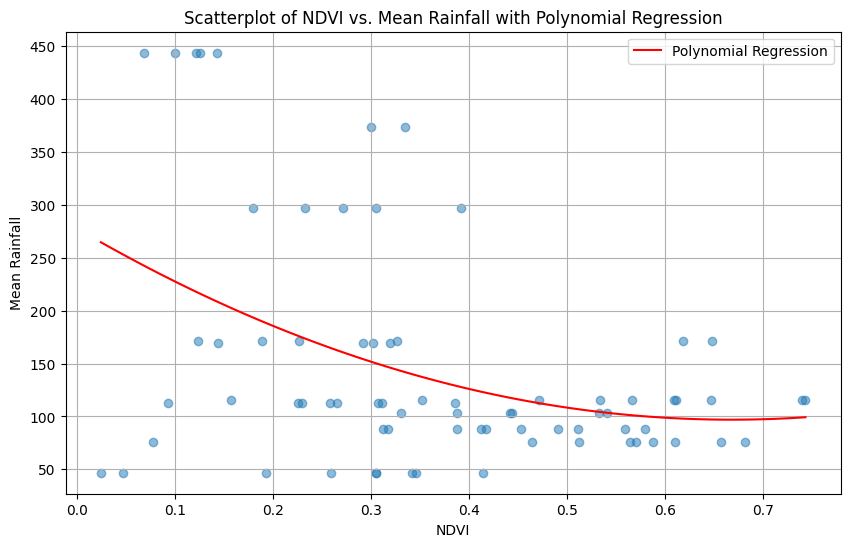

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'merged_data' is your DataFrame from the previous steps
# and contains 'system:time_start', 'NDVI', and 'mean' (rainfall) columns

# Convert 'system:time_start' to numeric values for plotting
ndvi['system:time_start_numeric'] = pd.to_numeric(pd.to_datetime(ndvi['system:time_start']))

# Extract x and y data for the plot
x = ndvi['NDVI']
y = ndvi['mean']

# Create scatterplot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(x, y, alpha=0.5)  # alpha controls point transparency

# Polynomial regression (degree=2 for example)
coefficients = np.polyfit(x, y, 2)  # Fit a 2nd-degree polynomial
polynomial = np.poly1d(coefficients)
x_range = np.linspace(x.min(), x.max(), 100)  # Create x values for the line
y_line = polynomial(x_range)

# Plot regression line
plt.plot(x_range, y_line, color='red', label='Polynomial Regression')

# Customize plot
plt.xlabel('NDVI')
plt.ylabel('Mean Rainfall')
plt.title('Scatterplot of NDVI vs. Mean Rainfall with Polynomial Regression')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# ... (Your existing code for scatterplot) ...

# Calculate R-squared
y_pred = polynomial(x)  # Predicted y values using the polynomial
r_squared = r2_score(y, y_pred)

# Print R-squared
print(f"R-squared for Polynomial Regression: {r_squared}")

# ... (Rest of your code for showing the plot) ...

R-squared for Polynomial Regression: 0.17043440065596094


<ipython-input-46-305a9e7aa5be>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndvi['system:time_start'] = pd.to_datetime(ndvi['system:time_start'])


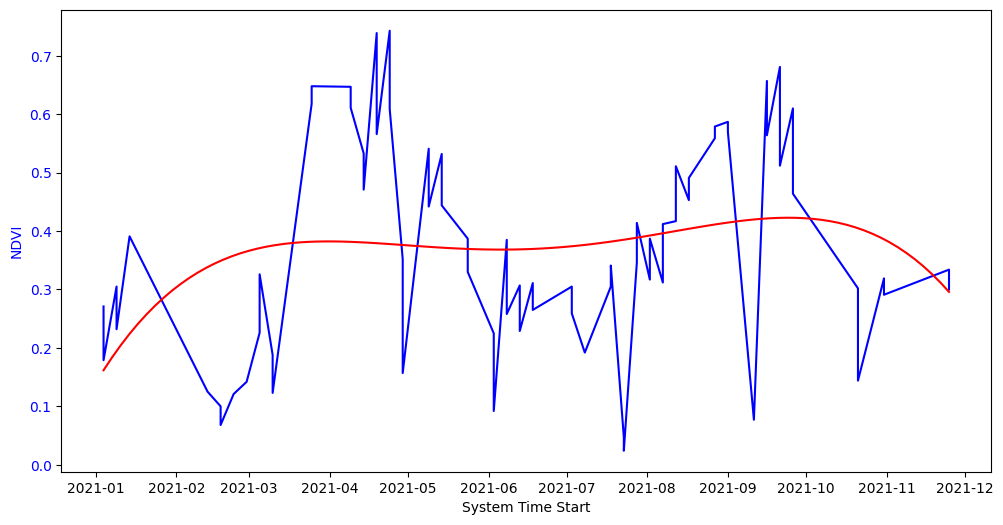

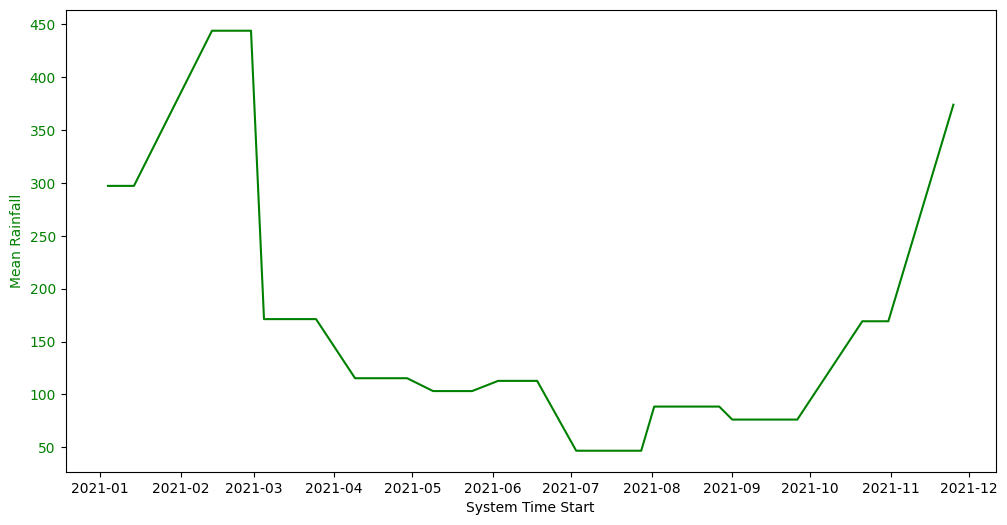

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'ndvi' is your DataFrame

# 1. Time Series Plot for NDVI with Polynomial Regression

# Convert 'system:time_start' to datetime objects
ndvi['system:time_start'] = pd.to_datetime(ndvi['system:time_start'])

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot NDVI on the first y-axis
ax1.plot(ndvi['system:time_start'], ndvi['NDVI'], color='blue', label='NDVI')
ax1.set_xlabel('System Time Start')
ax1.set_ylabel('NDVI', color='blue')
ax1.tick_params('y', labelcolor='blue')

# Calculate and plot the polynomial regression line for NDVI
x_reg_ndvi = pd.to_numeric(ndvi['system:time_start'])  # Convert datetime to numeric for regression
y_reg_ndvi = ndvi['NDVI']
coefficients_ndvi = np.polyfit(x_reg_ndvi, y_reg_ndvi, 4)  # Polynomial regression (degree=2)
polynomial_ndvi = np.poly1d(coefficients_ndvi)
x_range_reg_ndvi = np.linspace(x_reg_ndvi.min(), x_reg_ndvi.max(), 100)
y_line_reg_ndvi = polynomial_ndvi(x_range_reg_ndvi)

# Convert numeric x-values back to datetime for plotting
x_range_reg_ndvi_datetime = pd.to_datetime(x_range_reg_ndvi, unit='ns')  # Adjust unit if necessary

ax1.plot(x_range_reg_ndvi_datetime, y_line_reg_ndvi, color='red', label='Polynomial Regression (NDVI)')


# 2. Time Series Plot for Mean Rainfall

# Create the figure and axes
fig, ax2 = plt.subplots(figsize=(12, 6))

# Plot Mean Rainfall on the y-axis
ax2.plot(ndvi['system:time_start'], ndvi['mean'], color='green', label='Mean Rainfall')
ax2.set_xlabel('System Time Start')
ax2.set_ylabel('Mean Rainfall', color='green')
ax2.tick_params('y', labelcolor='green')

# Customize and show the plots
# ... (Customize titles, legends, grids, etc. as needed) ...

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau

# Assuming 'ndvi' is your DataFrame

# 1. Time Series Plot for NDVI with Polynomial Regression
# ... (Your existing code for NDVI plotting) ...

# 2. Time Series Plot for Mean Rainfall
# ... (Your existing code for Mean Rainfall plotting) ...

# 3. Calculate Kendall's Tau Correlation
ndvi_values = ndvi['NDVI']
rainfall_values = ndvi['mean']  # Assuming 'mean' column contains rainfall data
tau, p_value = kendalltau(ndvi_values, rainfall_values)

# 4. Print the results
print(f"Kendall's Tau Correlation: {tau}")
print(f"P-value: {p_value}")

plt.show()

NameError: name 'ndvi' is not defined

<ipython-input-48-7812dfa4f151>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndvi['system:time_start'] = pd.to_datetime(ndvi['system:time_start'])


R-squared for NDVI Polynomial Regression: 0.09104252028290105


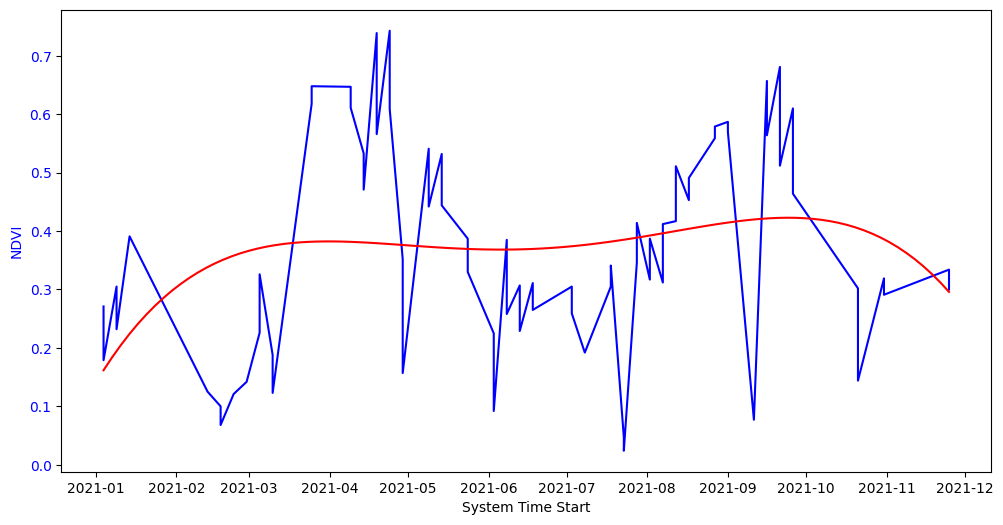

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score  # Import r2_score

# Assuming 'ndvi' is your DataFrame

# 1. Time Series Plot for NDVI with Polynomial Regression

# Convert 'system:time_start' to datetime objects
ndvi['system:time_start'] = pd.to_datetime(ndvi['system:time_start'])

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot NDVI on the first y-axis
ax1.plot(ndvi['system:time_start'], ndvi['NDVI'], color='blue', label='NDVI')
ax1.set_xlabel('System Time Start')
ax1.set_ylabel('NDVI', color='blue')
ax1.tick_params('y', labelcolor='blue')

# Calculate and plot the polynomial regression line for NDVI
x_reg_ndvi = pd.to_numeric(ndvi['system:time_start'])  # Convert datetime to numeric for regression
y_reg_ndvi = ndvi['NDVI']
coefficients_ndvi = np.polyfit(x_reg_ndvi, y_reg_ndvi, 4)  # Polynomial regression (degree=4)
polynomial_ndvi = np.poly1d(coefficients_ndvi)
x_range_reg_ndvi = np.linspace(x_reg_ndvi.min(), x_reg_ndvi.max(), 100)
y_line_reg_ndvi = polynomial_ndvi(x_range_reg_ndvi)

# Convert numeric x-values back to datetime for plotting
x_range_reg_ndvi_datetime = pd.to_datetime(x_range_reg_ndvi, unit='ns')  # Adjust unit if necessary

ax1.plot(x_range_reg_ndvi_datetime, y_line_reg_ndvi, color='red', label='Polynomial Regression (NDVI)')

# Calculate R-squared
y_pred_ndvi = polynomial_ndvi(x_reg_ndvi)  # Predicted NDVI values
r_squared_ndvi = r2_score(y_reg_ndvi, y_pred_ndvi)

# Print R-squared
print(f"R-squared for NDVI Polynomial Regression: {r_squared_ndvi}")

# ... (Rest of your code for Mean Rainfall plotting) ...

#plt.show()